In [1]:
import pandas as pd
#import docx
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
# pip install python-docx

In [2]:
DATE = 'Feb12_2024'
pd_lowess_ch = pd.read_csv(f'lowess_fit_cluster3__rel_2020_101yr__lowess_added_quantiles_added_clusters_normalised{DATE}.csv')
fill_option = 'repeat_last_101yrs' 
fit_to_median = False
path_merged_runs_scaled_extend = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)
from help_functions import pal_models, model_order, d_reg_num_name, model_order_anonymous, compute_steady_state_yr
hue_order_anonymous = []

pal_models_l = []
hue_order = []
for m, p in zip(model_order, pal_models):
    if (m!='OGGM-VAS') and (m!='OGGM_v153') and (m!='Huss'):
        hue_order.append(m)
ds_reg_models = ds_reg_models.sel(model_author = hue_order)


/home/users/lschuster/mambaforge/envs/oggm_gmip3/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
df_reg_models_count_models = ds_reg_models.volume_m3.isel(simulation_year=0).to_dataframe()

In [4]:
df_reg_models_count_models = (df_reg_models_count_models.reset_index().dropna().groupby('rgi_reg').count()/80)['model_author']
reg_w_only_glob_models = df_reg_models_count_models.loc[df_reg_models_count_models.values == 4].index
reg_w_5_models = df_reg_models_count_models.loc[df_reg_models_count_models.values == 5].index
reg_w_6_models = df_reg_models_count_models.loc[df_reg_models_count_models.values == 6].index


In [5]:
#'regional_volume_m3_itmix_vs_2020',
# 'regional_dvol_dt_2000_2019_vs_2020_vol',
       #'kmeans_cluster_3_rel_2020'
                    #'yr_diff_rgi_vs_2020', 
#'mean_len_ten_largest_glac',
        #'rgi_year_weighted_median',
       #  'elev_diff_to_med_area_weighted', don not use that because we don't have that for RGI19 !!!
#'lat_weighted_area_avg', 
#'geodetic_obs_area_weighted',
#'lat_weighted_area_avg', 
        #'slope_weighted_vol_avg',
#'temp_avg_1981-2000', 
#         'prcp_avg_1981-2000',
#'continentality_index_avg_1981-2000',
       # 'temp_avg_1995-2014',
#'prcp_avg_1995-2014',
        #'continentality_index_avg_1995-2014',
#'temp_ch_avg_1986-2005_vs_1901-1920',
#'temp_ch_avg_1995-2014_vs_1901-1920', 
approach = '_via_5yravg'
columns_sel3_d = {
    #'rgi_reg': 'rgi_reg',
    #'region': 'region',
    ####### climate indices 
    'temp_ch_avg_2000-2019_vs_1901-1920': 'ΔTemp 2000-2019 - 1901-1920 (reg-aw)',
    'temp_avg_2000-2019': 'Temp 2000-2019 (reg-aw)',
    'prcp_avg_2000-2019': 'Prcp 2000-2019 (reg-aw)',
    'continentality_index_avg_2000-2019': 'Continentality index 2000-2019 (reg-aw)',
    #'median_reg_vs_glob_ch': '',
    #'median_reg_vs_glob_temp_ch_above_zero_eight_deg': ,
    #'median_reg_vs_glob_temp_ch_0.8_1.5': '',
    'median_reg_vs_glob_temp_ch_1.5_3.0': 'Ratio reg vs global ΔTemp (median, reg-aw)',
    'median_reg_vs_glob_temp_ch_1.5_3.0': 'Ratio reg vs global ΔTemp (1.5-3.0°C, median, reg-aw)',
    #'slope_fit_reg_vs_glob_ch': 'Fitted slope regional vs global temp change (aw)',
    
    ##### glacier topography ... 
    'slope_weighted_area_avg': 'Glacier surface slope (reg-aw)',
    'lat_absolute_weighted_area_avg': 'Latitude (absolute, reg-aw)',
    'mean_vol_ten_largest_glac': 'Mean volume (10 largest)',
    'mean_area_ten_largest_glac': 'Mean area (10 largest)',
    'elev_diff_area_weighted': 'Elevation difference (reg-aw)',
    'max_elev_area_weighted': 'Maximum elevation (reg-aw)',
    'min_elev_area_weighted': 'Minimum elevation (reg-aw)',
    'ice_cap_ratio_hundredlargest_glac': 'Ratio ice caps (100 largest)',
    'marine_term_ratio_hundredlargest_glac': 'Ratio marine-terminating (100 largest)',
    #'regional_volume_m3_itmix': 'Reg volume (inventory date)',
    f'regional_volume_m3_2020{approach}': 'Reg volume (2020)',

    # glacier changes in the past
    'dvoldt_m3_hugonnet': '20-year reg ΔVolΔt 2000-2019 (Hugonnet, 2021)',
    '20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%': '20-year reg ΔVolΔt 2000-2019 rel. to 2000 Vol',
    #'20yr_regional_dvol_dt_2000_2019_vs_farinotti_vol_%': '20-year reg dVoldt 2000-2019 rel. to Volume inventory date',
    
    # glacier simulation changes from GMIP3 
    'resp_time_-50%_1_5_deg': 'Time to reach 50% of changes (~1.5°C, reg)',
    'resp_time_-50%_3_0_deg': 'Time to reach 50% of changes (~3.0°C, reg)',
    'resp_time_-80%_1_5_deg': 'Time to reach 80% of changes (~1.5°C, reg)',
    'resp_time_-80%_3_0_deg': 'Time to reach 80% of changes (~3.0°C, reg)',
    'ice_loss_1.2°C_%_rel_2020': 'Committed ice loss (1.2°C, reg, %, rel. 2020)',
    'ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020': 'Ice loss temp sensitivity (1.5-3.0°C, reg, rel. 2020)'
}
columns_sel3 = columns_sel3_d.keys()

df = pd.read_csv(f'3_shift_summary_region_characteristics{DATE}.csv', index_col=[0])


All    1.000000
01     0.118157
02     0.005783
03     0.180746
04     0.052456
05     0.097531
06     0.023233
07     0.047753
08     0.001727
09     0.094295
10     0.000794
11     0.000617
12     0.000312
13     0.020151
14     0.018075
15     0.004773
16     0.000500
17     0.031767
18     0.000382
19     0.300945
Name: regional_volume_m3_2020_via_5yravg, dtype: float64

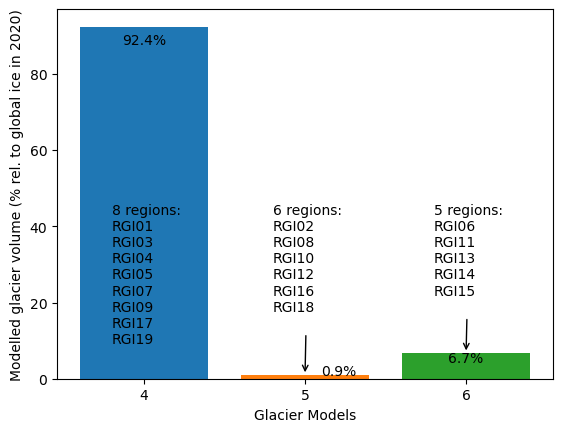

In [6]:

perc_rel_2020_glob_models = 100*df.loc[reg_w_only_glob_models].sum()['regional_volume_m3_2020_via_5yravg'] /df.loc['All','regional_volume_m3_2020_via_5yravg']
perc_rel_2020_5_models = 100*df.loc[reg_w_5_models].sum()['regional_volume_m3_2020_via_5yravg'] /df.loc['All','regional_volume_m3_2020_via_5yravg']
perc_rel_2020_6_models = 100*df.loc[reg_w_6_models].sum()['regional_volume_m3_2020_via_5yravg'] /df.loc['All','regional_volume_m3_2020_via_5yravg']


plt.bar(4, perc_rel_2020_glob_models)
reg_w_only_glob_models_str =  f'{len(reg_w_only_glob_models)} regions:\n'
for r in reg_w_only_glob_models:
    reg_w_only_glob_models_str += f'RGI{r}\n'
plt.annotate(reg_w_only_glob_models_str, (3.8, perc_rel_2020_glob_models*0.5),
            verticalalignment = 'top')
plt.text(4, perc_rel_2020_glob_models*0.95,f'{perc_rel_2020_glob_models.round(1)}%', horizontalalignment='center')



plt.bar(5, perc_rel_2020_5_models)
reg_w_5_models_str = f'{len(reg_w_5_models)} regions:\n'
for r in reg_w_5_models:
    reg_w_5_models_str += f'RGI{r}\n'
plt.annotate(reg_w_5_models_str, xytext=(4.8, perc_rel_2020_glob_models*0.5),
             xy=(5, perc_rel_2020_5_models),
             arrowprops={'arrowstyle' :'->'},
            verticalalignment = 'top')
plt.text(5.1, perc_rel_2020_5_models*1.1,f'{perc_rel_2020_5_models.round(1)}%')

plt.bar(6, perc_rel_2020_6_models)
reg_w_6_models_str = f'{len(reg_w_6_models)} regions:\n'
for r in reg_w_6_models:
    reg_w_6_models_str += f'RGI{r}\n'
plt.annotate(reg_w_6_models_str, xytext=(5.8, perc_rel_2020_glob_models*0.5),
             xy=(6, perc_rel_2020_6_models),
             arrowprops={'arrowstyle' :'->'},
            verticalalignment = 'top')
plt.text(6, perc_rel_2020_6_models*0.65,f'{perc_rel_2020_6_models.round(1)}%', horizontalalignment='center')

plt.xticks([4,5,6])
plt.xlabel('Glacier Models')
plt.ylabel('Modelled glacier volume (% rel. to global ice in 2020)')

df['regional_volume_m3_2020_via_5yravg']/df.loc['All','regional_volume_m3_2020_via_5yravg']

In [7]:
from oggm import utils

df_rgi6g = pd.read_hdf(utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/rgi/rgi62_stats.h5'))
df_rgi6g = df_rgi6g.loc[df_rgi6g.Connect != 2]
for rgi_reg in df_rgi6g.O1Region.unique():
    rgidf = df_rgi6g.loc[df_rgi6g.O1Region == rgi_reg]
    df.loc[rgi_reg, 'RGI v6.0 area (km²)'] = rgidf['Area'].sum()
df.loc['All', 'RGI v6.0 area (km²)'] = df_rgi6g['Area'].sum()

In [8]:
rgi_regs_5000 = ['01', '03', '04', '05', '06','07', '09', '17','19']
df['Simulation time'] = str(2000)
df.loc['All', 'Simulation time'] = ''
for r in rgi_regs_5000:
    df.loc[r,'Simulation time'] = str(5000)

In [9]:
rgi_reg_fig_dict = {'All':'Global',
                    '01':'Alaska (01)',
                    '02':'W Canada & US (02)',
                    '03':'Arctic Canada N (03)',
                    '04':'Arctic Canada S (04)',
                    '05':'Greenland Periphery (05)',
                    '06':'Iceland (06)',
                    '07':'Svalbard (07)',
                    '08':'Scandinavia (08)',
                    '09':'Russian Arctic (09)',
                    '10':'North Asia (10)',
                    '11':'Central Europe (11)',
                    '12':'Caucasus & Middle East (12)',
                    '13':'Central Asia (13)',
                    '14':'South Asia W (14)', # West
                    '15':'South Asia E (15)', # East
                    '16':'Low Latitudes (16)',
                    '17':'Southern Andes (17)',
                    '18':'New Zealand (18)',
                    '19':'Subantarctic & Antarctic Islands (19)'
                    }

In [10]:
cols_s4 = ['Simulation time', 'rgi_year_weighted_median','RGI v6.0 area (km²)','regional_volume_m3_itmix',
           'regional_volume_m3_2020_via_5yravg', '20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%', 'slope_weighted_area_avg']
df_s4 = df[cols_s4]
df_s4.loc[:, 'slope_weighted_area_avg'] = df_s4['slope_weighted_area_avg'].round(1)  # do not show NaN
# let's also compute for all glaciers
# df_s4.loc['All', 'slope_weighted_area_avg'] = '' # do not show NaN
df_s4.loc[:,'RGI v6.0 area (km²)'] = df_s4['RGI v6.0 area (km²)'].round(0).astype(int)
df_s4.loc[:,'rgi_year_weighted_median'] = df_s4['rgi_year_weighted_median'].round(0).astype(int)
df_s4.loc[:,'regional_mass_gt_itmix'] = (df_s4['regional_volume_m3_itmix']*900 *1e-12).round(0).astype(int) # kg/m3 , kg -> Gt
df_s4.loc[:,'regional_mass_gt_2020_via_5yravg'] = (df_s4['regional_volume_m3_2020_via_5yravg']*900 *1e-12).round(0).astype(int) # km3
df_s4.loc[:,'20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%'] = df_s4['20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%'].round(1)
rename_cols = {'Simulation time':'Simulation _time (2000_ or 5000)',
               'rgi_year_weighted_median': 'RGI date$^{37}$ (glacier-area weighted median)',
               'RGI v6.0 area (km²)':'RGI date area$^{37}$ (km²)',
               'regional_mass_gt_itmix':r'RGI date mass estimate$^{25}$ _(Gt)',
               'regional_mass_gt_2020_via_5yravg':r'2020 mass estimate$^{5,25}$ (Gt)',
               '20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%': r'Observed glacier mass loss$^{5,25}$ (2000-2019 rel. to 2000, %)',
               'slope_weighted_area_avg':'Glacier surface slope$^{37}$ (glacier-area weighted average, °)'}
df_s4 = df_s4.rename(columns=rename_cols)
# Transpose the DataFrame
df_s4 = df_s4.T
for r in rgi_reg_fig_dict.keys():
    df_s4 = df_s4.rename(columns = {r:rgi_reg_fig_dict[r]})

# Splitting long column names into multiple rows
f = df_s4.index.str.replace('_','')
df_s4.index = f # df_s4.index.str.split('_').map(tuple)
df_s4 = df_s4.T

/tmp/ipykernel_1591405/2045988989.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s4.loc[:,'regional_mass_gt_itmix'] = (df_s4['regional_volume_m3_itmix']*900 *1e-12).round(0).astype(int) # kg/m3 , kg -> Gt
/tmp/ipykernel_1591405/2045988989.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s4.loc[:,'regional_mass_gt_2020_via_5yravg'] = (df_s4['regional_volume_m3_2020_via_5yravg']*900 *1e-12).round(0).astype(int) # km3


In [11]:
df_s4_nice = df_s4.drop(columns=['regionalvolumem3itmix',
                    'regionalvolumem32020via5yravg']).sort_values(by=r'2020 mass estimate$^{5,25}$ (Gt)',
                                                                  ascending = False)

In [12]:
df_s4_nice.drop(columns=[r'2020 mass estimate$^{5,25}$ (Gt)'])

,Simulation time (2000 or 5000),RGI date$^{37}$ (glacier-area weighted median),RGI date area$^{37}$ (km²),"Observed glacier mass loss$^{5,25}$ (2000-2019 rel. to 2000, %)","Glacier surface slope$^{37}$ (glacier-area weighted average, °)",RGI date mass estimate$^{25}$ (Gt)
Global,,2000.0,705739.0,4.1,11.4,142341
Subantarctic & Antarctic Islands (19),5000,1986.0,132867.0,1.1,3.6,41820
Arctic Canada N (03),5000,1999.0,105111.0,2.6,9.6,25498
Alaska (01),5000,2010.0,86725.0,8.7,13.9,17081
Greenland Periphery (05),5000,2001.0,89717.0,5.6,10.3,14123
Russian Arctic (09),5000,2001.0,51592.0,1.7,11.9,13176
Arctic Canada S (04),5000,2001.0,40888.0,7.8,11.5,7750
Svalbard (07),5000,2008.0,33959.0,3.4,8.8,6723
Southern Andes (17),5000,2000.0,29429.0,10.0,14.9,4806
Iceland (06),5000,2000.0,11060.0,6.2,6.7,3393


In [33]:
df_s4.to_excel('table_ED_3.xlsx')

In [13]:
old = False
if old: 
    df_word = df_s4.copy()
    df_word.index.name = 'Region'
    # open an existing document
    doc = docx.Document() 

    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    t = doc.add_table(df_word.shape[0]+1, df_word.shape[1])

    # add the header rows.
    for j in range(df_word.shape[-1]):
        t.cell(0,j).text = df_word.columns[j]

    # add the rest of the data frame
    for i in range(df_word.shape[0]):
        for j in range(df_word.shape[-1]):
            t.cell(i+1,j).text = str(df_word.values[i,j])

    # add index names
    t.cell(0, 0).text = df_word.index.name
    for i in range(df_word.shape[0]):
        t.cell(i+1, 0).text = df_word.index[i]
    # save the doc
    doc.save('data/table_s4.docx')


### Steady-states estimates with uncertainties ... 

In [14]:
pd_fit_over_glob = pd.read_csv('lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_quantiles_added_fit_over_global_estimates_current12deg_5000_Feb12_2024_only_global_models_ipcc_ar6.csv')
pd_fit_over_glob = pd_fit_over_glob.where(np.isnan(pd_fit_over_glob.y)).dropna(how='all')
pd_fit_over_glob = pd_fit_over_glob.loc[pd_fit_over_glob.region == 'All']
pd_fit_over_glob.region = 'All_g*'

# global fit is done over medians over global stuff
# quantiles estimated the same as for 'All', but just showing the four glacier models 
pd_fit_only_glob_med_glob =pd.read_csv('lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_Feb12_2024_only_global_models_ipcc_ar6.csv')
pd_fit_only_glob_med_glob = pd_fit_only_glob_med_glob.where(np.isnan(pd_fit_only_glob_med_glob.y)).dropna(how='all')
pd_fit_only_glob_med_glob.loc[pd_fit_only_glob_med_glob.region == 'All','region'] = 'All_g_ms'
#pd_fit_only_glob_med_glob.region = 

In [15]:
pd_fit_only_glob_med_glob#.loc[pd_fit_only_glob_med_glob.region == 'All_g_ms']#['0.5'].values

,x,0.05,0.25,0.5,0.75,0.95,frac,region,year,fit_to_median,...,fit_opt,shift_years_2020,y,add,min_0.5_diff,min_0.5,min_0.5_diff_above_zero,median_absolute_deviation,rmse,algorithm_sel
2,-0.10,96.852222,103.107962,107.441003,107.516425,109.883210,0.20,All_g_ms,5000.0,False,...,lowess_fit,True,NaN,NaN,0.082473,4.699933,0.082473,2.707681,4.180617,non_negative_and_decreasing
3,-0.05,94.493854,101.325633,105.372570,105.742600,108.608446,0.20,All_g_ms,5000.0,False,...,lowess_fit,True,NaN,NaN,0.082473,4.699933,0.082473,2.707681,4.180617,non_negative_and_decreasing
4,0.00,92.220861,99.510989,103.229565,103.940297,107.249919,0.20,All_g_ms,5000.0,False,...,lowess_fit,True,NaN,NaN,0.082473,4.699933,0.082473,2.707681,4.180617,non_negative_and_decreasing
5,0.05,89.971968,97.561386,101.059294,102.109064,105.866604,0.20,All_g_ms,5000.0,False,...,lowess_fit,True,NaN,NaN,0.082473,4.699933,0.082473,2.707681,4.180617,non_negative_and_decreasing
7,0.10,87.717200,95.439768,98.925470,100.270461,104.497525,0.20,All_g_ms,5000.0,False,...,lowess_fit,True,NaN,NaN,0.082473,4.699933,0.082473,2.707681,4.180617,non_negative_and_decreasing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8951,6.65,1.742096,3.345553,9.955175,14.841231,23.228262,0.57,19,5000.0,False,...,lowess_fit,True,NaN,NaN,0.212507,8.958605,0.212507,13.363463,31.715020,non_negative_and_decreasing
8952,6.70,1.670218,3.221277,9.742510,14.443635,22.536112,0.57,19,5000.0,False,...,lowess_fit,True,NaN,NaN,0.212507,8.958605,0.212507,13.363463,31.715020,non_negative_and_decreasing
8953,6.75,1.597762,3.097348,9.529990,14.045297,21.841319,0.57,19,5000.0,False,...,lowess_fit,True,NaN,NaN,0.212507,8.958605,0.212507,13.363463,31.715020,non_negative_and_decreasing
8954,6.80,1.524659,2.973693,9.317482,13.646223,21.143311,0.57,19,5000.0,False,...,lowess_fit,True,NaN,NaN,0.212507,8.958605,0.212507,13.363463,31.715020,non_negative_and_decreasing


In [17]:
pd_sel = pd.read_csv(f'lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_Feb12_2024_ipcc_ar6.csv', index_col=[0])


In [23]:
_reg_count = ds_reg_models.volume_m3.isel(simulation_year=slice(-101,-1)).to_dataframe().reset_index().drop(columns=['extend_option']).dropna().groupby('rgi_reg').count()

In [26]:
_reg_count.loc[_reg_count['model_author']==32000].index

Index(['01', '03', '04', '05', '07', '09', '17', '19'], dtype='object', name='rgi_reg')

In [18]:
pd_sel

,0.05,0.25,0.5,0.75,0.95,frac,region,year,fit_to_median,temp_ch,...,fit_opt,shift_years_2020,y,add,min_0.5_diff,min_0.5,min_0.5_diff_above_zero,median_absolute_deviation,rmse,algorithm_sel
x,,,,,,,,,,,,,,,,,,,,,
-0.143529,94.495036,104.714382,109.355795,108.553283,110.832306,0.23,All,5000,False,NaN,...,lowess_fit,True,109.797196,NaN,0.087584,4.808715,0.087584,2.613016,4.206593,non_negative_and_decreasing
-0.131913,94.130211,104.244617,108.873779,108.205638,110.483821,0.23,All,5000,False,NaN,...,lowess_fit,True,104.544894,NaN,0.087584,4.808715,0.087584,2.613016,4.206593,non_negative_and_decreasing
-0.100000,93.127831,102.949424,107.552568,107.239692,109.526523,0.23,All,5000,False,NaN,...,lowess_fit,True,NaN,NaN,0.087584,4.808715,0.087584,2.613016,4.206593,non_negative_and_decreasing
-0.050000,91.544974,100.907630,105.490480,105.697626,108.018092,0.23,All,5000,False,NaN,...,lowess_fit,True,NaN,NaN,0.087584,4.808715,0.087584,2.613016,4.206593,non_negative_and_decreasing
0.000000,89.937241,98.851987,103.435129,104.124648,106.487637,0.23,All,5000,False,NaN,...,lowess_fit,True,NaN,NaN,0.087584,4.808715,0.087584,2.613016,4.206593,non_negative_and_decreasing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.850000,1.450839,2.850260,9.104859,13.246453,20.441977,0.57,19,5000,False,NaN,...,lowess_fit,True,NaN,NaN,0.212507,8.958605,0.212507,13.363463,31.715020,non_negative_and_decreasing
6.884361,1.399666,2.765545,8.958605,12.971352,19.958082,0.57,19,5000,False,NaN,...,lowess_fit,True,2.995482,NaN,0.212507,8.958605,0.212507,13.363463,31.715020,non_negative_and_decreasing
6.884361,1.399666,2.765545,8.958605,12.971352,19.958082,0.57,19,5000,False,NaN,...,lowess_fit,True,13.124228,NaN,0.212507,8.958605,0.212507,13.363463,31.715020,non_negative_and_decreasing


In [16]:
sim_year = 5000
qs = [0.05,0.25,0.5,0.75,0.95]

pd_sel = pd.read_csv(f'lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_Feb12_2024_ipcc_ar6.csv', index_col=[0])
# only select the values in a 0.05 temp. grid:
pd_sel = pd_sel.where(np.isnan(pd_sel.y)).dropna(how='all')
assert pd_sel.year.unique() == sim_year
# aggregate regional quantiles to get global quantile estimate 
# for the median, we do the fit directly using the individual median fits 
pd_vol_2020 = pd.read_csv(f'rgi_vs_2020_volume_hugonnet_estimates{DATE}.csv', index_col=[0])
pd_vol_2020 = pd_vol_2020.rename(index={'Globally':'Global'})
pd_sel['vol_2020_reg_m3'] = np.NaN
for rgi_reg in pd_sel.region.unique():
    if rgi_reg == 'All':
        _rgi_reg = 'Global'
    else:
        _rgi_reg = rgi_reg
    vol_2020 = pd_vol_2020.loc[_rgi_reg, f'regional_volume_m3_2020{approach}']
    pd_sel.loc[pd_sel.region == rgi_reg, 'vol_2020_reg_m3'] = vol_2020
    pd_fit_over_glob.loc[pd_fit_over_glob.region== rgi_reg, 'vol_2020_reg_m3'] = vol_2020
    pd_fit_only_glob_med_glob.loc[pd_fit_only_glob_med_glob.region== rgi_reg, 'vol_2020_reg_m3'] = vol_2020
for q in qs:
    q = str(q)
    pd_sel[f'{q}_m3'] = pd_sel[f'{q}'] * pd_sel['vol_2020_reg_m3'] /100
    pd_fit_only_glob_med_glob[f'{q}_m3'] = pd_fit_only_glob_med_glob[f'{q}'] * pd_fit_only_glob_med_glob['vol_2020_reg_m3'] /100

global_vol_2020_m3 = pd_vol_2020.loc['Global',f'regional_volume_m3_2020{approach}']

    
####### global estimate from all glacier models 
pd_sel_q_glob = pd_sel.loc[pd_sel.region != 'All'].reset_index()
pd_sel_global_sum_over_reg_fitted_quantiles = 100*pd_sel_q_glob[['x','0.05_m3', '0.25_m3', #'0.5_m3',
       '0.75_m3', '0.95_m3']].groupby('x').sum()/global_vol_2020_m3
pd_sel_global_sum_over_reg_fitted_quantiles = pd_sel_global_sum_over_reg_fitted_quantiles.rename(columns = {'0.05_m3':'0.05', 
                                                                                                            '0.25_m3':'0.25',
                                                                                                            '0.75_m3':'0.75',
                                                                                                            '0.95_m3':'0.95'})
# the 0.5 median estimate should come from the actual global fit over the sum of the medians
pd_sel_global_sum_over_reg_fitted_quantiles['0.5'] = pd_sel.loc[pd_sel.region == 'All']['0.5'].values
pd_fit_quantiles_reg_sum_global = pd_sel_global_sum_over_reg_fitted_quantiles.copy().reset_index()

####### global estimate from just the four glacier models 
# quantiles estimated the same as for 'All', but just showing the four glacier models 
pd_sel_q_glob_models = pd_fit_only_glob_med_glob.loc[pd_fit_only_glob_med_glob.region != 'All_g_ms'].reset_index()
pd_sel_global_sum_over_reg_fitted_quantiles_models = 100*pd_sel_q_glob_models[['x','0.05_m3', '0.25_m3', #'0.5_m3',
       '0.75_m3', '0.95_m3']].groupby('x').sum()/global_vol_2020_m3
pd_sel_global_sum_over_reg_fitted_quantiles_models = pd_sel_global_sum_over_reg_fitted_quantiles_models.rename(columns = {'0.05_m3':'0.05', 
                                                                                                            '0.25_m3':'0.25',
                                                                                                            #'0.5_m3':'0.5', # median also comes from the sum...
                                                                                                            '0.75_m3':'0.75',
                                                                                                            '0.95_m3':'0.95'})
# the 0.5 median estimate is done by doing a fit over the sum of the medians
pd_sel_global_sum_over_reg_fitted_quantiles_models['0.5'] = pd_fit_only_glob_med_glob.loc[pd_fit_only_glob_med_glob.region == 'All_g_ms']['0.5'].values
pd_fit_quantiles_reg_sum_global_models_m = pd_sel_global_sum_over_reg_fitted_quantiles_models.copy().reset_index()
pd_fit_quantiles_reg_sum_global_models_m['region']= 'All_g_ms'

#### MERGE ALL TOGETHER
pd_fit_quantiles = pd_sel.copy().reset_index()
#pd_fit_quantiles = pd_sel.reset_index()
# need to compute the global uncertainties differently !!!
pd_fit_quantiles = pd_fit_quantiles.loc[pd_fit_quantiles.region !='All']
pd_fit_quantiles_reg_sum_global['region'] = 'All'
pd_fit_quantiles = pd.concat([pd_fit_quantiles_reg_sum_global,pd_fit_over_glob[pd_fit_quantiles_reg_sum_global.columns], pd_fit_quantiles_reg_sum_global_models_m,
                              pd_fit_quantiles])
pd_fit_quantiles = pd_fit_quantiles[pd_fit_quantiles_reg_sum_global.columns]
pd_fit_quantiles.index = pd_fit_quantiles.x.round(4)
pd_fit_quantiles = pd_fit_quantiles.loc[np.arange(-0.1, 6.86,0.05).round(2)]

AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.

In [38]:
100-pd_fit_quantiles.loc[pd_fit_quantiles.region=='All'].loc[1.2][['0.05','0.25','0.5','0.75','0.95']]

0.05    68.439449
0.25     56.08782
0.5     39.710529
0.75     25.16279
0.95    -1.363055
Name: 1.2, dtype: object

In [39]:
100-pd_fit_quantiles.loc[pd_fit_quantiles.region=='All_g*'].loc[1.2][['0.05','0.5','0.95']]

0.05    57.232236
0.5     37.581498
0.95     8.913625
Name: 1.2, dtype: object

In [40]:
100-pd_fit_quantiles.loc[pd_fit_quantiles.region=='All_g_ms'].loc[1.2][['0.05','0.5','0.95']]

0.05    68.508515
0.5     40.154821
0.95    -0.736446
Name: 1.2, dtype: object

In [41]:
uncert_all_gstar = pd_fit_quantiles.loc[pd_fit_quantiles.region=='All_g*'].loc[1.2]['0.5']-pd_fit_quantiles.loc[pd_fit_quantiles.region=='All_g*'].loc[1.2][['0.05','0.95']]

In [42]:
print(uncert_all_gstar)

0.05    19.650738
0.95   -28.667872
Name: 1.2, dtype: object


In [43]:
uncert_all_g_ms = pd_fit_quantiles.loc[pd_fit_quantiles.region=='All_g_ms'].loc[1.2]['0.5']-pd_fit_quantiles.loc[pd_fit_quantiles.region=='All_g_ms'].loc[1.2][['0.05','0.95']]

In [44]:
print(uncert_all_g_ms)

0.05    28.353694
0.95   -40.891267
Name: 1.2, dtype: object


In [45]:
uncert_all_g_ms/uncert_all_gstar

0.05    1.442882
0.95     1.42638
Name: 1.2, dtype: object

In [46]:
np.abs(uncert_all_g_ms).sum()/np.abs(uncert_all_gstar).sum()

1.4330909106952185

**How much are the uncertainties decreased if just using the global models, and looking at the globally aggregated stuff directly**


Around 92% of ice in 2020 was modelled by just the four global models. When just using the four global glacier models, we get e.g. at 1.2°C a global committed ice loss of `38% [9, 57]` when computing both median and 5th and 9th percentiles directly from the global aggregates (see FIg. S18). When assessing the 5th and 95th percentiles by using the same method as applied for the main results (i.e., computing the percentiles regionally from the LOWESS fits and then assuming perfect dependence of the uncertainties) but now just using the four global models, the uncertainties are overestimated  by a factor of around 1.4. 

    - Note that this number was found by dividing the 90th percentile range of `all_g_ms` through the one from `all_g*`

In [47]:
for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
    for q in [0.05, 0.25, 0.75, 0.95]: # 0.5, 
        q = str(q)
        pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg, q] = np.minimum.accumulate(pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg][q].values)

In [48]:
pd_fit_quantiles.region.unique()

array(['All', 'All_g*', 'All_g_ms', '01', '02', '03', '04', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19'], dtype=object)

In [49]:
pd_steady_state = pd.DataFrame(index = pd_fit_quantiles.region.values)
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:
    for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
        s = pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]
        s_t= s.loc[temp]
        v = f'{s_t["0.5"].round(1)} [{s_t["0.05"].round(0).astype(int)} to {s_t["0.95"].round(0).astype(int)}]' 
        # we are not interested in 50%-range ...
        # {s_t["0.25"].round(0).astype(int)}, {s_t["0.75"].round(0).astype(int)},
        pd_steady_state.loc[rgi_reg,f'{temp}°C steady _state mass _(% rel. to 2020)'] = v
        #v_loss = f'{(100-s_t["0.5"]).round(0).astype(int)} [{(100-s_t["0.05"]).round(0).astype(int)}, {(100-s_t["0.95"]).round(0).astype(int)}]' 
        #pd_steady_state.loc[rgi_reg,f'{temp}°C mass loss (% rel. to 2020)'] = v_loss

for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
    s = pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]
    temp_s = ((s.loc[1.5]["0.5"] - s.loc[3.0]["0.5"])/1.5).round(1)   
    pd_steady_state.loc[rgi_reg, r'Sensitivity of steady-state _glacier mass to ΔT _(% °C $^{-1}$, ΔT=1.5-3.0°C'] = temp_s 
                        #temperature _sensitivity steady _state volume (% / °C)'] = temp_s
# Transpose the DataFrame
pd_steady_state = pd_steady_state.T
# Splitting long column names into multiple rows
f = pd_steady_state.index.str.replace('_','')
pd_steady_state.index = f#pd_steady_state.index.str.split('_').map(tuple)
pd_steady_state = pd_steady_state.T



In [50]:
s_t["0.05"].round(0).astype(int)

4

In [51]:
pd_steady_state[:3]

,1.2°C steady state mass (% rel. to 2020),1.5°C steady state mass (% rel. to 2020),2.0°C steady state mass (% rel. to 2020),2.7°C steady state mass (% rel. to 2020),3.0°C steady state mass (% rel. to 2020),4.0°C steady state mass (% rel. to 2020),5.0°C steady state mass (% rel. to 2020),"Sensitivity of steady-state glacier mass to ΔT (% °C $^{-1}$, ΔT=1.5-3.0°C"
All,60.3 [32 to 101],52.8 [25 to 94],36.3 [17 to 81],24.4 [9 to 65],22.4 [7 to 61],14.6 [3 to 48],9.1 [2 to 36],20.3
All_g*,62.4 [43 to 91],54.3 [32 to 86],38.9 [22 to 63],29.0 [13 to 57],27.2 [10 to 50],18.5 [6 to 37],9.9 [3 to 23],18.1
All_g_ms,59.8 [31 to 101],52.1 [25 to 93],36.4 [17 to 81],24.5 [9 to 64],22.7 [7 to 60],15.0 [3 to 48],8.9 [2 to 36],19.6


- median [0.05, 0.95]
    - all -> uncertainties are sum over regional quantiles, and thus an overestimate
    - all_g*: only the global glacier models, doing the fit over the global estimates of the four individual glacier models ... 
        - is probably a better estimate of the uncertainties ..
        - maybe use the median from `all`, but the uncertainties from `all_g*` ???
    - all_g_ms : only the global models, but doing the uncertainties in the same way as `all` (i.e. summing up regional quantiles)
        - --> overestimates uncertainties 

In [52]:
pd_lowess_ch['gt_2020_via_5yravg'] = pd_lowess_ch['regional_volume_m3_2020_via_5yravg']*900/ (1e9*1e3)

pd_lowess_ch['1e3_gt_2020_via_5yravg'] = pd_lowess_ch['regional_volume_m3_2020_via_5yravg']*900/ (1e9*1e3)/1e3


**Get the uncertainties for the sensitivities...**

In [53]:
pd_steady_state_table = pd.DataFrame(index = pd_fit_quantiles.region.values)
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:
    for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
        s = pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]
        s_t= s.loc[temp]
        #v = f'{s_t["0.5"].round(1)} [{s_t["0.05"].round(0).astype(int)}, {s_t["0.95"].round(0).astype(int)}]' 
        
        num_digits = 1
        med = "{: >{}}".format((100-s_t["0.5"]).round(0).astype(int), num_digits)#.rjust(2)
        high = "{: >{}}".format((100-s_t["0.05"]).round(0).astype(int),num_digits)#.rjust(2) # losses -> invert 5th and 95th ... 
        low = "{: >{}}".format((100-s_t["0.95"]).round(0).astype(int),num_digits)#.rjust(3)
    
        # Adjust the width to be num_digits if a number is present, otherwise use a space
        num_digits = 2
        med = f'{med: >{num_digits}}' if med else f'{"": >{num_digits}}'
        low = f'{low: >{num_digits}}' if low else f'{"": >{num_digits}}'
        num_digits = 3
        high = f'{high: >{num_digits}}' if high else f'{"": >{num_digits}}'
        v = f'{med} [{low} to {high}]' 
        
        # we are not interested in 50%-range ...
        # {s_t["0.25"].round(0).astype(int)}, {s_t["0.75"].round(0).astype(int)},
        pd_steady_state_table.loc[rgi_reg,f'ΔT={temp}°C'] = v  ### mass loss ... 
        #num_digits = 2
        #med = "{: >{}}".format((100-s_t["0.5"]).round(0).astype(int), num_digits)
        #low = "{: >{}}".format((100-s_t["0.05"]).round(0).astype(int),num_digits)
        #high = "{: >{}}".format((100-s_t["0.95"]).round(0).astype(int),num_digits)

        #v_loss = f'{med} [{low}, {high}]' 
        #pd_steady_state_table.loc[rgi_reg,f'{temp}°C'] = v_loss  #  (% rel. to 2020)

## now get the individual per-glacier model fits ... 
pd_per_glac_model_fit = pd.read_csv('per_glacier_lowess_calib/fitted_per_model_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_current12deg_5000_Feb12_2024_ipcc_ar6.csv')

for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
    s = pd_fit_quantiles.loc[pd_fit_quantiles.region == rgi_reg]
    _m = ((s.loc[1.5]["0.5"] - s.loc[3.0]["0.5"])/1.5)
    temp_s = _m.round(0).astype(int) 
    _m = np.array([_m])
    # estimates from per-glacier-model fits 
    _temp = 1.5
    pd_per_glac_model_fit_reg = pd_per_glac_model_fit.loc[pd_per_glac_model_fit.region == rgi_reg]
    pd_3_0 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.x.round(4)==_temp+1.5]
    pd_3_0 = pd_3_0.set_index('model_author')
    pd_1_5 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.x.round(4)==_temp]
    pd_1_5 = pd_1_5.set_index('model_author')
    _vals = ((pd_1_5['0.5'] - pd_3_0['0.5'])/1.5).values # % volume changes per 1°C change
    # append median from overall fit as well, and compute out of that a distribution to get the 0.05/0.95 %-iles
    _l,_u = pd.Series(np.concatenate([_vals,_m])).quantile([0.05,0.95]).values
    #print(_vals, _m)
    print(f'{rgi_reg}: temp. range {_temp}-{_temp+1.5}°C:  {temp_s}[{_l.round(2)} to {_u.round(2)}], single values:  {_vals.round(2)}')
    _l = _l.round(0).astype(int)
    _u = _u.round(0).astype(int)
    
    pd_steady_state_table.loc[rgi_reg, 'Sensitivity to ΔT (ΔT=1.5-3.0°C)'] = f'{temp_s} [{_l} to {_u}]' 
                        #temperature _sensitivity steady _state volume (% / °C)'] = temp_s
# Transpose the DataFrame
pd_steady_state_table = pd_steady_state_table.T
# Splitting long column names into multiple rows
f = pd_steady_state_table.index.str.replace('_','')
pd_steady_state_table.index = f#pd_steady_state.index.str.split('_').map(tuple)
pd_steady_state_table = pd_steady_state_table.T


pd_steady_state_table = pd_steady_state_table[:22].loc[['All', '01', '02', '03', '04', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18','19']].copy()

All: temp. range 1.5-3.0°C:  20[14.39 to 26.58], single values:  [16.28 27.57 22.63 13.92]
All_g*: temp. range 1.5-3.0°C:  18[18.08 to 18.08], single values:  []
All_g_ms: temp. range 1.5-3.0°C:  20[19.6 to 19.6], single values:  []
01: temp. range 1.5-3.0°C:  20[12.16 to 22.18], single values:  [11.78 18.91 22.78 13.69]
02: temp. range 1.5-3.0°C:  12[3.47 to 22.04], single values:  [24.61  3.4   3.68 14.35 13.67]
03: temp. range 1.5-3.0°C:  24[14.08 to 23.88], single values:  [22.94 23.02 21.35 12.26]
04: temp. range 1.5-3.0°C:  8[3.22 to 10.53], single values:  [ 4.77 10.72  9.77  2.83]
05: temp. range 1.5-3.0°C:  17[12.38 to 22.78], single values:  [23.16 21.29 12.58 12.33]
06: temp. range 1.5-3.0°C:  22[10.44 to 27.93], single values:  [13.38 28.81 19.23 25.88 22.23  9.18]
07: temp. range 1.5-3.0°C:  24[19.89 to 24.31], single values:  [19.35 22.92 24.4  22.06]
08: temp. range 1.5-3.0°C:  12[7.75 to 18.44], single values:  [ 7.92 14.5  13.07 19.75  7.69]
09: temp. range 1.5-3.0°C: 

**Now, create the table with all the data**

In [54]:
from help_functions import d_reg_num_name

In [55]:
for r in pd_steady_state_table.index[1:]:
    pd_steady_state_table.loc[r, 'Region'] = d_reg_num_name[r] + f' ({r})' #R'
pd_steady_state_table.loc['All', 'Region'] = 'Global'
assert pd_lowess_ch.iloc[-1]['region'] == '19'
pd_lowess_ch.index = pd_steady_state_table.index.values
#arr = pd_lowess_ch.loc[pd_steady_state_table.index, 'resp_time_-80%_1_5_deg'].values
#result = np.where(np.isnan(arr), np.nan, np.round(arr,0).astype(int))
#result_str = np.where(np.isnan(result), 'nan', result.astype(str))
#pd_steady_state_table['Response time scale (years)'] = result_str

pd_steady_state_table['Mass 2020 (Gt)'] = pd_lowess_ch.loc[pd_steady_state_table.index,'gt_2020_via_5yravg'].values.round(0).astype(int)#.astype(str)
pd_steady_state_table = pd_steady_state_table.set_index('Region')

In [59]:
_resp_time = pd.read_csv('resp_time_shifted_X%_threshold25%_for_deltaT_rgi_reg_roll_volume_21yravg.csv', index_col=[0])
perc = 80
d_temp = 0.2
temp = 1.5 
list_regs = ['All', # why nan???
             '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
'Global_mm_1.00',
'Global_mm_0.85', 'Global_mm_var', 'Global_mm_var_l']
list_regs_names=['Global', 'Alaska (01)', 'W Canada & US (02)', 'Arctic Canada N (03)',
       'Arctic Canada S (04)', 'Greenland Periphery (05)', 'Iceland (06)',
       'Svalbard & Jan Mayen (07)', 'Scandinavia (08)', 'Russian Arctic (09)',
       'North Asia (10)', 'Central Europe (11)', 'Caucasus & Middle East (12)',
       'Central Asia (13)', 'South Asia W (14)', 'South Asia E (15)',
       'Low Latitudes (16)', 'Southern Andes (17)', 'New Zealand (18)',
       'Subantarctic & Antarctic Islands (19)', 'Global_mm_1.00',
       'Global_mm_0.85', 'Global_mm_var', 'Global_mm_var_l']

list_regs_dict = {}
for r,n in zip(list_regs,list_regs_names):
    list_regs_dict[r] = n
for j,rgi_reg in enumerate(_resp_time.rgi_reg.unique()):
    _resp_time_r = _resp_time.loc[_resp_time.rgi_reg==rgi_reg]
    #color = cmap(scaler.transform(np.array(temp).reshape(-1,1))).squeeze()
    _resp_time_r_temp = _resp_time_r.loc[(_resp_time_r.temp_ch_ipcc>=temp-d_temp) & (_resp_time_r.temp_ch_ipcc<=temp+d_temp)]
    _resp_time_r_temp_sel = _resp_time_r_temp[[f'resp_time_-{perc}%']].quantile([0.05,0.5,0.95]).astype(int)
    if rgi_reg != 'All':
        _r = rgi_reg[-2:]
    else:
        _r = rgi_reg
    pd_steady_state_table.loc[list_regs_dict[_r], 'Response time scale (years)'] = f'{_resp_time_r_temp_sel.loc[0.5].values.squeeze()} [{_resp_time_r_temp_sel.loc[0.05].values.squeeze()}, {_resp_time_r_temp_sel.loc[0.95].values.squeeze()}]'
    

# Define a function to format the rows
def format_row(response):
    # Extract the response numbers
    main_value, range_values = response.split(' [')
    lower_value, upper_value = range_values[:-1].split(', ')
    
    # Format the components
    #region_formatted = f'{region:<40}'
    main_value_formatted = f'{main_value:>4}'
    lower_value_formatted = f'{lower_value:>3}'
    upper_value_formatted = f'{upper_value:>4}'
    
    return f'{main_value_formatted} [{lower_value_formatted} to {upper_value_formatted}]'

# Apply the formatting
formatted_data = [format_row(row['Response time scale (years)']) for _,row in pd_steady_state_table.iloc[5:].reset_index().iterrows()]

for _,row in pd_steady_state_table.iloc[5:].reset_index().iterrows():
    pd_steady_state_table.loc[row.Region, 'Response time scale (years)'] = format_row(row['Response time scale (years)'])

In [60]:
# Create a new DataFrame with the formatted strings
formatted_df = pd.DataFrame({'Formatted Response': formatted_data})

# Print the new DataFrame
print(formatted_df)

    Formatted Response
0    373 [230 to 1003]
1    316 [ 54 to  696]
2    318 [190 to  695]
3    166 [ 75 to  269]
4    445 [249 to 1111]
5     47 [ 37 to  159]
6     42 [ 27 to  115]
7     30 [ 24 to   66]
8    103 [ 64 to  159]
9    139 [ 89 to  183]
10    47 [ 30 to   81]
11    23 [ 12 to   37]
12    86 [ 58 to  137]
13    36 [ 23 to   58]
14   828 [196 to 1396]


In [61]:
pd_steady_state_table['unit'] = '%' ### need to say that in the caption ... (rel. to 2020)
pd_steady_state_table['unit2'] = '% per °C'

pd_steady_state_table.loc['Global_mm_0.85'] = np.NaN
pd_steady_state_table.loc['Global_mm_0.85','Mass 2020 (Gt)'] = pd_steady_state_table.loc['Global','Mass 2020 (Gt)'].astype(int)

pd_steady_state_table.loc['Global_mm_1.00'] = np.NaN
pd_steady_state_table.loc['Global_mm_1.00','Mass 2020 (Gt)'] = pd_steady_state_table.loc['Global','Mass 2020 (Gt)'].astype(int)

pd_steady_state_table.loc['Global_mm_var'] = np.NaN
pd_steady_state_table.loc['Global_mm_var','Mass 2020 (Gt)'] = pd_steady_state_table.loc['Global','Mass 2020 (Gt)'].astype(int)
pd_steady_state_table.loc['Global_mm_var_l'] = np.NaN
pd_steady_state_table.loc['Global_mm_var_l','Mass 2020 (Gt)'] = pd_steady_state_table.loc['Global','Mass 2020 (Gt)'].astype(int)
pd_steady_state_table['Mass 2020 (Gt)'] = pd_steady_state_table['Mass 2020 (Gt)'].astype(int)
pd_steady_state_table = pd_steady_state_table.sort_values(by='Mass 2020 (Gt)', ascending=False)

pd_steady_state_table.loc['Global_mm_0.85','unit'] = 'mm SLE'
pd_steady_state_table.loc['Global_mm_0.85','unit2'] = 'mm SLE per °C'
pd_steady_state_table.loc['Global_mm_1.00','unit'] = 'mm SLE'
pd_steady_state_table.loc['Global_mm_1.00','unit2'] = 'mm SLE per °C'
pd_steady_state_table.loc['Global_mm_var','unit'] = 'mm SLE'
pd_steady_state_table.loc['Global_mm_var','unit2'] = 'mm SLE per °C'

pd_steady_state_table.loc['Global_mm_var_l','unit'] = 'mm SLE'
pd_steady_state_table.loc['Global_mm_var_l','unit2'] = 'mm SLE per °C'

$\Delta M_{asl} = M_{2020}\cdot ratio_{M,2020} - M_{ss}\cdot ratio_{M,ss}$


$SLE(mm) = 1000\cdot \frac{\Delta M_{asl}}{\rho_{ocean}}\cdot A_{ocean}$

In [62]:

def convert_rel_ice_2020_mm_slr(perc, frac = 0.85):
    pd_vol_glob_2020_m3 = pd_lowess_ch['regional_volume_m3_2020_via_5yravg']['All']
    #need to compute the volume at steady-state 
    vol_ss = perc/100 * pd_vol_glob_2020_m3

    ### fit done in 5_tests_for_conversion.... using OGGM data ...
    if frac=='variable':
        #slope = -7.79626349851309*1e-7 * 1e-9 #km3 to 
        #intercept = 0.9589270046484103 
        # use the unfilled fit values 
        slope_unfilled = -6.859874897888118*1e-7 * 1e-9 #km3 to 
        intercept_unfilled = 0.9540695779131956 ## that means the ratio is maximum 0.95
        
        ratio = slope_unfilled*vol_ss + intercept_unfilled 
        if ratio <0.7:
            ratio = 0.7
        vol_asl_ss = vol_ss*ratio
        print(ratio)
        
        ratio = slope_unfilled*pd_vol_glob_2020_m3 + intercept_unfilled 
        if ratio <0.7:
            ratio = 0.7
        pd_vol_asl_glob_2020_m3 = pd_vol_glob_2020_m3*ratio
        print(ratio)
    elif frac == 'variable_lowess':
        df_quantiles = pd.read_csv('OGGM_gmip3_unfilled_ratio_asl_total_volume.csv', index_col=0)
        ratio = df_quantiles.loc[(vol_ss/1e9).round(0)]
        vol_asl_ss = vol_ss*ratio
        print(ratio.values)

        ratio = df_quantiles.loc[(pd_vol_glob_2020_m3/1e9).round(0)]
        pd_vol_asl_glob_2020_m3 = pd_vol_glob_2020_m3*ratio
        print(ratio.values)
    else:
        ratio = frac
        pd_vol_asl_glob_2020_m3 = pd_vol_glob_2020_m3*ratio
        vol_asl_ss = vol_ss*ratio
        
    # then compute volume difference  in m3
    # we use the grounded ice formulation from Farinotti et al... 
    # it is a bit 
    vol_asl_diff = pd_vol_asl_glob_2020_m3 - vol_asl_ss
    
    # convert m3 into sea-level equivalent 
    #A_ocean = 3.625 * 10^8
    A_ocean = 3.625 * 10**8 * 1e6 #km2 -> m2 -> 1e6
    m_slr = (vol_asl_diff/A_ocean) *900/1028 # rhoice/rho_ocean
    mm_slr = m_slr * 1000
    
    
    return mm_slr.squeeze()

**if ratio increases when we have less remaining ice volume, then the resulting glacier volume is lower than when assuming a constant ratio!!!**

In [63]:
assert convert_rel_ice_2020_mm_slr(50, frac = 0.85) < convert_rel_ice_2020_mm_slr(50, frac = 1)
assert convert_rel_ice_2020_mm_slr(50, frac = 0.85) > convert_rel_ice_2020_mm_slr(50, frac = 0.8)

In [64]:
 convert_rel_ice_2020_mm_slr(40, frac=0.8).round(0).astype(int)  

177

In [65]:
 convert_rel_ice_2020_mm_slr(40, frac='variable').round(0).astype(int)  

0.9121509504093187
0.8492730091535033


179

In [66]:
# they should be similar
np.testing.assert_allclose(convert_rel_ice_2020_mm_slr(50, frac='variable_lowess'),
                            convert_rel_ice_2020_mm_slr(50, frac='variable'), atol=2)

np.testing.assert_allclose(convert_rel_ice_2020_mm_slr(10, frac='variable_lowess'),
                            convert_rel_ice_2020_mm_slr(10, frac='variable'), atol=2)
                                                  

[0.89312353]
[0.84852352]
0.9016712935333494
0.8492730091535033
[0.96361446]
[0.84852352]
0.9435899210372264
0.8492730091535033


In [67]:
frac =1
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:

    _s = pd_fit_quantiles.loc[temp]
    perc_med = _s.loc[_s.region=='All']['0.5'].values
    perc_low = _s.loc[_s.region=='All']['0.05'].values
    perc_high = _s.loc[_s.region=='All']['0.95'].values

    mm_med = convert_rel_ice_2020_mm_slr(perc_med, frac=frac)
    mm_med_r = mm_med.round(0).astype(int) 
    mm_high = convert_rel_ice_2020_mm_slr(perc_low, frac=frac)  # high --> low
    mm_high_r = mm_high.round(0).astype(int)
    mm_low = convert_rel_ice_2020_mm_slr(perc_high, frac=frac).round(0).astype(int) 
    mm_low_r = mm_low.round(0).astype(int)
    
    pd_steady_state_table.loc['Global_mm_1.00', f'ΔT={temp}°C'] = f'{mm_med_r} [{mm_low_r} to {mm_high_r}]'

    if temp == 1.5:
        mm_med_15 = mm_med
        #mm_high_15 = mm_high
        #mm_low_15 = mm_low
    elif temp == 3.0:
        mm_med_30 = mm_med
        #mm_high_30 = mm_high
        #mm_low_30 = mm_low

mm_sens_med = ((mm_med_30 - mm_med_15)/1.5).round(0).astype(int)
#mm_sens_high = ((mm_high_30 - mm_high_15)/1.5).round(0).astype(int)
#mm_sens_low = ((mm_low_30 - mm_low_15)/1.5).round(0).astype(int)

# compute quantile from per-glacier model fits 
# here we only have frac = 1
_vals1 = (convert_rel_ice_2020_mm_slr(pd_3_0['0.5'], frac=1) - convert_rel_ice_2020_mm_slr(pd_1_5['0.5'], frac=1)).values/1.5
sens_1_95 = np.quantile(np.concatenate([_vals1, np.array([mm_sens_med])]), 0.95)
sens_1_05 = np.quantile(np.concatenate([_vals1, np.array([mm_sens_med])]), 0.05)

mm_sens_95 = np.max([sens_1_95,sens_1_05]).round(0).astype(int)
mm_sens_05 = np.min([sens_1_95,sens_1_05,]).round(0).astype(int)
#mm_sens_high = ((mm_high_30 - mm_high_15)/1.5).round(0).astype(int)
#mm_sens_low = ((mm_low_30 - mm_low_15)/1.5).round(0).astype(int)

pd_steady_state_table.loc['Global_mm_1.00', 'Sensitivity to ΔT (ΔT=1.5-3.0°C)'] = f'{mm_sens_med} [{mm_sens_05} to {mm_sens_95}]'

In [68]:
pd_steady_state_table

,ΔT=1.2°C,ΔT=1.5°C,ΔT=2.0°C,ΔT=2.7°C,ΔT=3.0°C,ΔT=4.0°C,ΔT=5.0°C,Sensitivity to ΔT (ΔT=1.5-3.0°C),Mass 2020 (Gt),Response time scale (years),unit,unit2
Region,,,,,,,,,,,,
Global,40 [-1 to 68],47 [ 6 to 75],64 [19 to 83],76 [35 to 91],78 [39 to 93],85 [52 to 97],91 [64 to 98],20 [14 to 27],137491,"463 [199, 827]",%,% per °C
Global_mm_0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137491,NaN,mm SLE,mm SLE per °C
Global_mm_var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137491,NaN,mm SLE,mm SLE per °C
Global_mm_1.00,147 [-5 to 253],174 [23 to 275],235 [69 to 306],279 [130 to 336],286 [144 to 342],315 [191 to 356],336 [236 to 362],75 [50 to 102],137491,NaN,mm SLE,mm SLE per °C
Global_mm_var_l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137491,NaN,mm SLE,mm SLE per °C
Subantarctic & Antarctic Islands (19),36 [-44 to 60],44 [-33 to 67],56 [-16 to 77],67 [ 5 to 86],70 [14 to 89],77 [37 to 94],83 [53 to 96],17 [14 to 28],41377,828 [196 to 1396],%,% per °C
Arctic Canada N (03),32 [-10 to 71],35 [-6 to 74],47 [ 3 to 80],69 [22 to 90],71 [22 to 92],82 [28 to 98],93 [47 to 99],24 [14 to 24],24851,"644 [323, 759]",%,% per °C
Alaska (01),37 [22 to 61],41 [24 to 66],58 [30 to 74],70 [38 to 84],71 [40 to 88],80 [46 to 94],87 [55 to 97],20 [12 to 22],16246,"104 [65, 184]",%,% per °C
Greenland Periphery (05),58 [28 to 75],63 [35 to 80],68 [45 to 84],86 [64 to 98],89 [66 to 99],96 [72 to 100],98 [82 to 100],17 [12 to 23],13410,373 [230 to 1003],%,% per °C


In [69]:
rgi_reg = 'All'
_temp = 1.5
pd_per_glac_model_fit_reg = pd_per_glac_model_fit.loc[pd_per_glac_model_fit.region == rgi_reg]
pd_3_0 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.x.round(4)==_temp+1.5]
pd_3_0 = pd_3_0.set_index('model_author')
pd_1_5 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.x.round(4)==_temp]
pd_1_5 = pd_1_5.set_index('model_author')

frac =0.85
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:

    _s = pd_fit_quantiles.loc[temp]
    perc_med = _s.loc[_s.region=='All']['0.5'].values
    perc_low = _s.loc[_s.region=='All']['0.05'].values
    perc_high = _s.loc[_s.region=='All']['0.95'].values

    mm_med = convert_rel_ice_2020_mm_slr(perc_med, frac=frac)
    mm_med_r = mm_med.round(0).astype(int) 
    mm_high = convert_rel_ice_2020_mm_slr(perc_low, frac=frac)  # high --> low
    mm_high_r = mm_high.round(0).astype(int)
    mm_low = convert_rel_ice_2020_mm_slr(perc_high, frac=frac).round(0).astype(int) 
    mm_low_r = mm_low.round(0).astype(int)
    
    pd_steady_state_table.loc['Global_mm_0.85', f'ΔT={temp}°C'] = f'{mm_med_r} [{mm_low_r} to {mm_high_r}]'

    if temp == 1.5:
        mm_med_15 = mm_med
        #mm_high_15 = mm_high
        #mm_low_15 = mm_low
    elif temp == 3.0:
        mm_med_30 = mm_med
        #mm_high_30 = mm_high
        #mm_low_30 = mm_low

mm_sens_med = ((mm_med_30 - mm_med_15)/1.5).round(0).astype(int)

# compute quantile from per-glacier model fits 
_vals1 = (convert_rel_ice_2020_mm_slr(pd_3_0['0.5'], frac=1) - convert_rel_ice_2020_mm_slr(pd_1_5['0.5'], frac=1)).values/1.5
sens_1_95 = np.quantile(np.concatenate([_vals1, np.array([mm_sens_med])]), 0.95)
sens_1_05 = np.quantile(np.concatenate([_vals1, np.array([mm_sens_med])]), 0.05)

_vals08 = (convert_rel_ice_2020_mm_slr(pd_3_0['0.5'], frac=0.8) - convert_rel_ice_2020_mm_slr(pd_1_5['0.5'], frac=0.8)).values/1.5
sens_08_95 = np.quantile(np.concatenate([_vals08, np.array([mm_sens_med])]), 0.95)
sens_08_05 = np.quantile(np.concatenate([_vals08, np.array([mm_sens_med])]), 0.05)
mm_sens_95 = np.max([sens_1_95,sens_1_05, sens_08_95, sens_08_05]).round(0).astype(int)
mm_sens_05 = np.min([sens_1_95,sens_1_05, sens_08_95, sens_08_05]).round(0).astype(int)
#mm_sens_high = ((mm_high_30 - mm_high_15)/1.5).round(0).astype(int)
#mm_sens_low = ((mm_low_30 - mm_low_15)/1.5).round(0).astype(int)
pd_steady_state_table.loc['Global_mm_0.85', 'Sensitivity to ΔT (ΔT=1.5-3.0°C)'] = f'{mm_sens_med} [{mm_sens_05} to {mm_sens_95}]'


frac = 'variable'
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:

    _s = pd_fit_quantiles.loc[temp]
    perc_med = _s.loc[_s.region=='All']['0.5'].values
    perc_low = _s.loc[_s.region=='All']['0.05'].values
    perc_high = _s.loc[_s.region=='All']['0.95'].values

    
    mm_med = convert_rel_ice_2020_mm_slr(perc_med, frac=frac)
    mm_med_r = mm_med.round(0).astype(int) 
    mm_high = convert_rel_ice_2020_mm_slr(perc_low, frac=1)  # high --> low
    mm_high_r = mm_high.round(0).astype(int)
    mm_low = convert_rel_ice_2020_mm_slr(perc_high, frac=0.8).round(0).astype(int) 
    mm_low_r = mm_low.round(0).astype(int)
    
    pd_steady_state_table.loc['Global_mm_var', f'ΔT={temp}°C'] = f'{mm_med_r} [{mm_low_r} to {mm_high_r}]'

    if temp == 1.5:
        mm_med_15 = mm_med
        #mm_high_15 = mm_high
        #mm_low_15 = mm_low
    elif temp == 3.0:
        mm_med_30 = mm_med
        #mm_high_30 = mm_high
        #mm_low_30 = mm_low

mm_sens_med = ((mm_med_30 - mm_med_15)/1.5).round(0).astype(int)
#mm_sens_high = ((mm_high_30 - mm_high_15)/1.5).round(0).astype(int)
#mm_sens_low = ((mm_low_30 - mm_low_15)/1.5).round(0).astype(int)

pd_steady_state_table.loc['Global_mm_var', 'Sensitivity to ΔT (ΔT=1.5-3.0°C)'] = f'{mm_sens_med} [{mm_sens_05} to {mm_sens_95}]'


frac = 'variable_lowess'
for temp in [1.2, 1.5, 2.0, 2.7, 3.0, 4.0, 5.0]:

    _s = pd_fit_quantiles.loc[temp]
    perc_med = _s.loc[_s.region=='All']['0.5'].values
    perc_low = _s.loc[_s.region=='All']['0.05'].values
    perc_high = _s.loc[_s.region=='All']['0.95'].values

    
    mm_med = convert_rel_ice_2020_mm_slr(perc_med, frac=frac)
    mm_med_r = mm_med.round(0).astype(int) 
    mm_high = convert_rel_ice_2020_mm_slr(perc_low, frac=1)  # high --> low
    mm_high_r = mm_high.round(0).astype(int)
    mm_low = convert_rel_ice_2020_mm_slr(perc_high, frac=0.8).round(0).astype(int) 
    mm_low_r = mm_low.round(0).astype(int)
    
    pd_steady_state_table.loc['Global_mm_var_l', f'ΔT={temp}°C'] = f'{mm_med_r} [{mm_low_r} to {mm_high_r}]'

    if temp == 1.5:
        mm_med_15 = mm_med
        #mm_high_15 = mm_high
        #mm_low_15 = mm_low
    elif temp == 3.0:
        mm_med_30 = mm_med
        #mm_high_30 = mm_high
        #mm_low_30 = mm_low

mm_sens_med = ((mm_med_30 - mm_med_15)/1.5).round(0).astype(int)
#mm_sens_high = ((mm_high_30 - mm_high_15)/1.5).round(0).astype(int)
#mm_sens_low = ((mm_low_30 - mm_low_15)/1.5).round(0).astype(int)

pd_steady_state_table.loc['Global_mm_var_l', 'Sensitivity to ΔT (ΔT=1.5-3.0°C)'] = f'{mm_sens_med} [{mm_sens_05} to {mm_sens_95}]'

[0.89088828]
0.8492730091535033
[0.89873806]
0.8492730091535033
[0.91606969]
0.8492730091535033
[0.92845786]
0.8492730091535033
[0.9305795]
0.8492730091535033
[0.93872893]
0.8492730091535033
[0.9445818]
0.8492730091535033
[[0.87988075]]
[0.84852352]
[[0.88934513]]
[0.84852352]
[[0.91421855]]
[0.84852352]
[[0.93645679]]
[0.84852352]
[[0.94049305]]
[0.84852352]
[[0.95536904]]
[0.84852352]
[[0.96527858]]
[0.84852352]


In [70]:
pd_steady_state_table_sel = pd_steady_state_table[['Mass 2020 (Gt)','unit', 'ΔT=1.2°C',  'ΔT=1.5°C',  'ΔT=2.0°C', 'ΔT=2.7°C',  'ΔT=3.0°C',
                                                   'ΔT=4.0°C',  'unit2', 'Sensitivity to ΔT (ΔT=1.5-3.0°C)']]
                      
# Create a MultiIndex for the columns
g1 = 'Committed glacier mass loss at ΔT (rel. to 2020)'
g2 = 'Sensitivity to ΔT (rel. to 2020)'
columns = pd.MultiIndex.from_tuples([
    ('Mass 2020', '(Gt)'),
    (g1, 'unit'),
    (g1, 'ΔT=1.2°C'),
    (g1, 'ΔT=1.5°C'),
    (g1, 'ΔT=2.0°C'),
    (g1, 'ΔT=2.7°C'),
    (g1, 'ΔT=3.0°C'),
    (g1, 'ΔT=4.0°C'),
    (g2, 'unit'),
    (g2, 'ΔT=1.5 to ΔT=3.0°C')
])
pd_steady_state_table_sel.columns = columns
# Add spaces between columns of different groups
#pd_steady_state_table_sel.columns = pd.MultiIndex.from_tuples([
#    (f'{col[0]}                                             ', f'{col[1]}') for col in pd_steady_state_table_sel.columns
#])
#empty_col = pd.DataFrame(columns=[''])
#pd_steady_state_table_sel = pd.concat([pd_steady_state_table_sel.iloc[:, :2], empty_col, pd_steady_state_table_sel.iloc[:, 2:]], axis=1, ignore_index=True)


In [71]:
pd_steady_state_table_sel

Mass 2020  \
                                           (Gt)   
Region                                            
Global                                   137491   
Global_mm_0.85                           137491   
Global_mm_var                            137491   
Global_mm_1.00                           137491   
Global_mm_var_l                          137491   
Subantarctic & Antarctic Islands (19)     41377   
Arctic Canada N (03)                      24851   
Alaska (01)                               16246   
Greenland Periphery (05)                  13410   
Russian Arctic (09)                       12965   
Arctic Canada S (04)                       7212   
Svalbard & Jan Mayen (07)                  6566   
Southern Andes (17)                        4368   
Iceland (06)                               3194   
Central Asia (13)                          2771   
South Asia W (14)                          2485   
W Canada & US (02)                          795   
South Asia E (15)                           656   
Scandinavia (08)                            237   
North Asia (10)                             109   
Central Europe (11)                          85   
Low Latitudes (16)                           69   
New Zealand (18)                             53   
Caucasus & Middle East (12)                  43   

                                      Committed glacier mass loss at ΔT (rel. to 2020)  \
                                                                                  unit   
Region                                                                                   
Global                                                                               %   
Global_mm_0.85                                                                  mm SLE   
Global_mm_var                                                                   mm SLE   
Global_mm_1.00                                                                  mm SLE   
Global_mm_var_l                                                                 mm SLE   
Subantarctic & Antarctic Islands (19)                                                %   
Arctic Canada N (03)                                                                 %   
Alaska (01)                                                                          %   
Greenland Periphery (05)                                                             %   
Russian Arctic (09)                                                                  %   
Arctic Canada S (04)                                                                 %   
Svalbard & Jan Mayen (07)                                                            %   
Southern Andes (17)                                                                  %   
Iceland (06)                                                                         %   
Central Asia (13)                                                                    %   
South Asia W (14)                                                                    %   
W Canada & US (02)                                                                   %   
South Asia E (15)                                                                    %   
Scandinavia (08)                                                                     %   
North Asia (10)                                                                      %   
Central Europe (11)                                                                  %   
Low Latitudes (16)                                                                   %   
New Zealand (18)                                                                     %   
Caucasus & Middle East (12)                                                          %   

                                                                         \
                                              ΔT=1.2°C         ΔT=1.5°C   
Region                                                                    
Glob

In [72]:
pd_steady_state_table_sel_nicer = pd_steady_state_table_sel.copy()

In [73]:
pd_steady_state_table_sel_nicer= pd_steady_state_table_sel_nicer.drop(['Global_mm_0.85','Global_mm_1.00','Global_mm_var_l'])

In [74]:
pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.loc[['Global_mm_var', 'Global',  'Subantarctic & Antarctic Islands (19)',
       'Arctic Canada N (03)', 'Alaska (01)', 'Greenland Periphery (05)',
       'Russian Arctic (09)', 'Arctic Canada S (04)',
       'Svalbard & Jan Mayen (07)', 'Southern Andes (17)', 'Iceland (06)',
       'Central Asia (13)', 'South Asia W (14)', 'W Canada & US (02)',
       'South Asia E (15)', 'Scandinavia (08)', 'North Asia (10)',
       'Central Europe (11)', 'Low Latitudes (16)', 'New Zealand (18)',
       'Caucasus & Middle East (12)']]

In [75]:
pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'Global':''})
pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'Global_mm_var':'Global'})

pd_steady_state_table_sel_nicer.loc['', ('Mass 2020', '(Gt)')] = ''

In [76]:
pd_steady_state_table_sel_nicer

Mass 2020  \
                                           (Gt)   
Region                                            
Global                                   137491   
                                                  
Subantarctic & Antarctic Islands (19)     41377   
Arctic Canada N (03)                      24851   
Alaska (01)                               16246   
Greenland Periphery (05)                  13410   
Russian Arctic (09)                       12965   
Arctic Canada S (04)                       7212   
Svalbard & Jan Mayen (07)                  6566   
Southern Andes (17)                        4368   
Iceland (06)                               3194   
Central Asia (13)                          2771   
South Asia W (14)                          2485   
W Canada & US (02)                          795   
South Asia E (15)                           656   
Scandinavia (08)                            237   
North Asia (10)                             109   
Central Europe (11)                          85   
Low Latitudes (16)                           69   
New Zealand (18)                             53   
Caucasus & Middle East (12)                  43   

                                      Committed glacier mass loss at ΔT (rel. to 2020)  \
                                                                                  unit   
Region                                                                                   
Global                                                                          mm SLE   
                                                                                     %   
Subantarctic & Antarctic Islands (19)                                                %   
Arctic Canada N (03)                                                                 %   
Alaska (01)                                                                          %   
Greenland Periphery (05)                                                             %   
Russian Arctic (09)                                                                  %   
Arctic Canada S (04)                                                                 %   
Svalbard & Jan Mayen (07)                                                            %   
Southern Andes (17)                                                                  %   
Iceland (06)                                                                         %   
Central Asia (13)                                                                    %   
South Asia W (14)                                                                    %   
W Canada & US (02)                                                                   %   
South Asia E (15)                                                                    %   
Scandinavia (08)                                                                     %   
North Asia (10)                                                                      %   
Central Europe (11)                                                                  %   
Low Latitudes (16)                                                                   %   
New Zealand (18)                                                                     %   
Caucasus & Middle East (12)                                                          %   

                                                                         \
                                              ΔT=1.2°C         ΔT=1.5°C   
Region                                                                    
Global                                 115 [-4 to 253]  138 [18 to 275]   
                                        40 [-1 to  68]   47 [ 6 to  75]   
Subantarctic & Antarctic Islands (19)  36 [-44 to  60]  44 [-33 to  67]   
Arctic Canada N (03)                   32 [-10 to  71]   35 [-6 to  74]   
Alaska (01)                             37 [22 to  61]   41 [24 to  66]   
Greenland Periphery (05)                58 [28 to  7

In [77]:
pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'Global':'', '': 'Global'})
#pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'':'Global'})
pd_steady_state_table_sel_nicer.loc['Global', ('Mass 2020', '(Gt)')] = pd_steady_state_table_sel_nicer.loc['', ('Mass 2020', '(Gt)')]
pd_steady_state_table_sel_nicer.loc['', ('Mass 2020', '(Gt)')] = ''

In [78]:
reg_ls = ['', 'Global', 'Subantarctic & Antarctic Islands (19)',
       'Arctic Canada N (03)', 'Alaska (01)', 'Greenland Periphery (05)',
       'Russian Arctic (09)', 'Arctic Canada S (04)',
       'Svalbard & Jan Mayen (07)', 'Southern Andes (17)', 'Iceland (06)',
       'Central Asia (13)', 'South Asia W (14)', 'W Canada & US (02)',
       'South Asia E (15)', 'Scandinavia (08)', 'North Asia (10)',
       'Central Europe (11)', 'Low Latitudes (16)', 'New Zealand (18)',
       'Caucasus & Middle East (12)'][::-1]

In [79]:
pd_steady_state_table_sel_nicer.loc[reg_ls]

Mass 2020  \
                                           (Gt)   
Region                                            
Caucasus & Middle East (12)                  43   
New Zealand (18)                             53   
Low Latitudes (16)                           69   
Central Europe (11)                          85   
North Asia (10)                             109   
Scandinavia (08)                            237   
South Asia E (15)                           656   
W Canada & US (02)                          795   
South Asia W (14)                          2485   
Central Asia (13)                          2771   
Iceland (06)                               3194   
Southern Andes (17)                        4368   
Svalbard & Jan Mayen (07)                  6566   
Arctic Canada S (04)                       7212   
Russian Arctic (09)                       12965   
Greenland Periphery (05)                  13410   
Alaska (01)                               16246   
Arctic Canada N (03)                      24851   
Subantarctic & Antarctic Islands (19)     41377   
Global                                   137491   
                                                  

                                      Committed glacier mass loss at ΔT (rel. to 2020)  \
                                                                                  unit   
Region                                                                                   
Caucasus & Middle East (12)                                                          %   
New Zealand (18)                                                                     %   
Low Latitudes (16)                                                                   %   
Central Europe (11)                                                                  %   
North Asia (10)                                                                      %   
Scandinavia (08)                                                                     %   
South Asia E (15)                                                                    %   
W Canada & US (02)                                                                   %   
South Asia W (14)                                                                    %   
Central Asia (13)                                                                    %   
Iceland (06)                                                                         %   
Southern Andes (17)                                                                  %   
Svalbard & Jan Mayen (07)                                                            %   
Arctic Canada S (04)                                                                 %   
Russian Arctic (09)                                                                  %   
Greenland Periphery (05)                                                             %   
Alaska (01)                                                                          %   
Arctic Canada N (03)                                                                 %   
Subantarctic & Antarctic Islands (19)                                                %   
Global                                                                               %   
                                                                                mm SLE   

                                                                         \
                                              ΔT=1.2°C         ΔT=1.5°C   
Region                                                                    
Caucasus & Middle East (12)             24 [-5 to  38]   45 [-4 to  65]   
New Zealand (18)                       16 [-52 to  63]   23 [-7 to  71]   
Low Latitudes (16)                     25 [-37 to  49]   46 [-8 to  66]   
Central Europe (11)                     56 [44 to  66]   65 [46 to  80]   
North Asia (10)                         55 [41 to  76]   70 [51 to  84]   
Scandinavia (08)                       65 [-38 to  9

**regine's variant''

In [80]:
pd_steady_state_table.loc[pd_steady_state_table['Response time scale (years)'].isna(),'Response time scale (years)'] = ''

In [81]:
pd_steady_state_table['Response time scale (years)']

Region
Global                                       463 [199, 827]
Global_mm_0.85                                             
Global_mm_var                                              
Global_mm_1.00                                             
Global_mm_var_l                                            
Subantarctic & Antarctic Islands (19)     828 [196 to 1396]
Arctic Canada N (03)                         644 [323, 759]
Alaska (01)                                   104 [65, 184]
Greenland Periphery (05)                  373 [230 to 1003]
Russian Arctic (09)                       445 [249 to 1111]
Arctic Canada S (04)                         241 [174, 656]
Svalbard & Jan Mayen (07)                 318 [190 to  695]
Southern Andes (17)                        86 [ 58 to  137]
Iceland (06)                              316 [ 54 to  696]
Central Asia (13)                         103 [ 64 to  159]
South Asia W (14)                         139 [ 89 to  183]
W Canada & US (02)               

In [103]:
pd_steady_state_table_sel_reg = pd_steady_state_table[['Mass 2020 (Gt)', 'ΔT=1.2°C',  'ΔT=1.5°C',  'ΔT=2.0°C', 'ΔT=2.7°C',  'ΔT=3.0°C',
                                                   'ΔT=4.0°C', 'Sensitivity to ΔT (ΔT=1.5-3.0°C)','Response time scale (years)']]
                      
# Create a MultiIndex for the columns
g1 = 'Committed glacier mass loss (% rel. to 2020)'
g2 = r'Sensitivity (% °C$^{-1}$ rel. to 2020)'
g3 = 'Response time scale (years)'
columns = pd.MultiIndex.from_tuples([
    ('Mass 2020', '(Gt)'),
    #(g1, 'unit'),
    (g1, 'ΔT=1.2°C'),
    (g1, 'ΔT=1.5°C'),
    (g1, 'ΔT=2.0°C'),
    (g1, 'ΔT=2.7°C'),
    (g1, 'ΔT=3.0°C'),
    (g1, 'ΔT=4.0°C'),
    #(g2, 'unit'),
    (g2, 'ΔT=1.5 to 3.0°C'),
    (g3, r'ΔT=1.5$\pm$0.2°C')
])
pd_steady_state_table_sel_reg.columns = columns
# Add spaces between columns of different groups
#pd_steady_state_table_sel.columns = pd.MultiIndex.from_tuples([
#    (f'{col[0]}                                             ', f'{col[1]}') for col in pd_steady_state_table_sel.columns
#])
#empty_col = pd.DataFrame(columns=[''])
#pd_steady_state_table_sel = pd.concat([pd_steady_state_table_sel.iloc[:, :2], empty_col, pd_steady_state_table_sel.iloc[:, 2:]], axis=1, ignore_index=True)
pd_steady_state_table_sel_reg= pd_steady_state_table_sel_reg.drop(['Global_mm_0.85','Global_mm_1.00',
                                                                   'Global_mm_var',
                                                                   'Global_mm_var_l'])
#pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'Globally':''})
#pd_steady_state_table_sel_nicer = pd_steady_state_table_sel_nicer.rename(index={'Globally_mm_var':'Globally'})
#pd_steady_state_table_sel_reg.loc['', ('Mass 2020', '(Gt)')] = ''

order = ['Global', 'Subantarctic & Antarctic Islands (19)',
       'Arctic Canada N (03)', 'Alaska (01)', 'Greenland Periphery (05)',
       'Russian Arctic (09)', 'Arctic Canada S (04)',
       'Svalbard & Jan Mayen (07)', 'Southern Andes (17)', 'Iceland (06)',
       'Central Asia (13)', 'South Asia W (14)', 'W Canada & US (02)',
       'South Asia E (15)', 'Scandinavia (08)', 'North Asia (10)',
       'Central Europe (11)', 'Low Latitudes (16)', 'New Zealand (18)',
       'Caucasus & Middle East (12)']

pd_steady_state_table_sel_reg = pd_steady_state_table_sel_reg.loc[order]

In [104]:
# Function to extract the first integer from the string
def extract_first_integer(s):
    return int(s.split()[0])

import matplotlib
from matplotlib.colors import LinearSegmentedColormap, rgb2hex


# Function to color cells based on value using a colormap
#def color_cells(val, cmap):
#    norm_val = (val - df.min().min()) / (df.max().max() - df.min().min())  # Normalize value to range 0-1
#    color = cmap(norm_val)  # Get color from colormap
#    hex_color = rgb2hex(color)  # Convert color to hex
#    return f'background-color: {hex_color}'

# Define the colormap
cmap = plt.get_cmap('YlOrRd')

# Function to assign colors based on 20% value steps using colormap
def assign_color(val):
    steps = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
    colors = [rgb2hex(cmap(step, alpha = 0.5)) for step in steps]
    bins = [0, 20, 40, 60, 80, 100]
    for i in range(len(bins) - 1):
        if bins[i] < val <= bins[i+1]:
            return f'background-color: {colors[i]}'
    return f'background-color: {colors[-1]}'

# Function to apply color based on the extracted number
def color_cells(val):
    num = extract_first_integer(val)
    return assign_color(num)



# Define the colormap: green to yellow to red
#cmap = LinearSegmentedColormap.from_list('green_yellow_red', ['green', 'yellow', 'red'])

# Applying the function to the DataFrame
#styled_df = pd_steady_state_table_sel_reg.style.applymap(lambda x: color_cells(x, cmap))

# To display the styled DataFrame in a Jupyter notebook or similar environment
#styled_df

In [105]:
pd_steady_state_table_sel_reg[pd_steady_state_table_sel_reg.columns[0]] = pd_steady_state_table_sel_reg[pd_steady_state_table_sel_reg.columns[0]].astype(int)

In [106]:
cols_coloring = [(g1, 'ΔT=1.2°C'),
                               (g1, 'ΔT=1.5°C'),
                               (g1, 'ΔT=2.0°C'),
                               (g1, 'ΔT=2.7°C'),
                               (g1, 'ΔT=3.0°C'),
                               (g1, 'ΔT=4.0°C')]
# Extract integers for coloring
df_integers = pd_steady_state_table_sel_reg[cols_coloring].applymap(extract_first_integer)
df_min, df_max = 0, 100 # df_integers.min().min(), df_integers.max().max()

# Apply the coloring function using the extracted integers, but keep original text
styled_df = pd_steady_state_table_sel_reg.style.apply(lambda col: col.apply(color_cells), subset=cols_coloring)

# Display the DataFrame with styles applied
styled_df

In [107]:
order_reg = df_integers.sort_values(by=[(g1,'ΔT=1.2°C')], ascending = False).index
# Apply the coloring function using the extracted integers, but keep original text
styled_df = pd_steady_state_table_sel_reg.loc[order_reg].style.apply(lambda col: col.apply(color_cells), subset=cols_coloring)

# Display the DataFrame with styles applied
styled_df

In [108]:
styled_df.to_excel('table_ED_1a.xlsx')

In [99]:
pd_steady_state_table_sel_reg = pd_steady_state_table[['Mass 2020 (Gt)', 'ΔT=1.2°C',  'ΔT=1.5°C',  'ΔT=2.0°C', 'ΔT=2.7°C',  'ΔT=3.0°C',
                                                   'ΔT=4.0°C', 'Sensitivity to ΔT (ΔT=1.5-3.0°C)']]
                      
# Create a MultiIndex for the columns
g1 = 'Committed glacier mass loss (mm SLE rel. to 2020)'
g2 = r'Sensitivity (mm SLE °C$^{-1}$ rel. to 2020)'
columns = pd.MultiIndex.from_tuples([
    ('', ''),
    #(g1, 'unit'),
    (g1, 'ΔT=1.2°C'),
    (g1, 'ΔT=1.5°C'),
    (g1, 'ΔT=2.0°C'),
    (g1, 'ΔT=2.7°C'),
    (g1, 'ΔT=3.0°C'),
    (g1, 'ΔT=4.0°C'),
    #(g2, 'unit'),
    (g2, 'ΔT=1.5 to 3.0°C')
])
pd_steady_state_table_sel_reg.columns = columns
# Add spaces between columns of different groups
#pd_steady_state_table_sel.columns = pd.MultiIndex.from_tuples([
#    (f'{col[0]}                                             ', f'{col[1]}') for col in pd_steady_state_table_sel.columns
#])
#empty_col = pd.DataFrame(columns=[''])
#pd_steady_state_table_sel = pd.concat([pd_steady_state_table_sel.iloc[:, :2], empty_col, pd_steady_state_table_sel.iloc[:, 2:]], axis=1, ignore_index=True)
pd_steady_state_table_sel_reg= pd_steady_state_table_sel_reg.loc[['Global_mm_var','Global_mm_1.00']]
pd_steady_state_table_sel_reg = pd_steady_state_table_sel_reg.rename(index={'Global_mm_var':'Global (below sea-level correction applied)'})
pd_steady_state_table_sel_reg = pd_steady_state_table_sel_reg.rename(index={'Global_mm_1.00': 'Global (no below sea-level correction applied)'})
pd_steady_state_table_sel_reg[('', '')] = ''
#pd_steady_state_table_sel_reg.loc['', ('below-sea', 'level correction')] = 'No'

#pd_steady_state_table_sel_reg = pd_steady_state_table_sel_reg.rename(columns={pd.MultiIndex.from_tuples([('Mass 2020', '(Gt)')]): pd.MultiIndex.from_tuples([('below-sea', 'level correction')])})

In [101]:
pd_steady_state_table_sel_reg

\
                                                   
Region                                             
Global (below sea-level correction applied)        
Global (no below sea-level correction applied)     

                                               Committed glacier mass loss (mm SLE rel. to 2020)  \
                                                                                        ΔT=1.2°C   
Region                                                                                             
Global (below sea-level correction applied)                                      115 [-4 to 253]   
Global (no below sea-level correction applied)                                   147 [-5 to 253]   

                                                                 \
                                                       ΔT=1.5°C   
Region                                                            
Global (below sea-level correction applied)     138 [18 to 275]   
Global (no below sea-level correction applied)  174 [23 to 275]   

                                                                 \
                                                       ΔT=2.0°C   
Region                                                            
Global (below sea-level correction applied)     191 [55 to 306]   
Global (no below sea-level correction applied)  235 [69 to 306]   

                                                                  \
                                                        ΔT=2.7°C   
Region                                                             
Global (below sea-level correction applied)     230 [104 to 336]   
Global (no below sea-level correction applied)  279 [130 to 336]   

                                                                  \
                                                        ΔT=3.0°C   
Region                                                             
Global (below sea-level correction applied)     236 [115 to 342]   
Global (no below sea-level correction applied)  286 [144 to 342]   

                                                                  \
                                                        ΔT=4.0°C   
Region                                                             
Global (below sea-level correction applied)     263 [153 to 356]   
Global (no below sea-level correction applied)  315 [191 to 356]   

                                               Sensitivity (mm SLE °C$^{-1}$ rel. to 2020)  
                                                                           ΔT=1.5 to 3.0°C  
Region                                                                                      
Global (below sea-level correction applied)                                  65 [42 to 98]  
Global (no below sea-level correction applied)                              75 [50 to 102]

In [102]:
pd_steady_state_table_sel_reg.to_excel('table_ED_1b.xlsx')

**Sensitivity to SLR computation choice...**

In [66]:
pd_steady_state_table_sel_reg

below-sea Glacier mass loss (mm SLE rel. to 2020)  \
               level correction                                ΔT=1.2°C   
Region                                                                    
Globally (SLE)              Yes                           115 [-4, 253]   
                             No                           147 [-5, 253]   

                                                                              \
                     ΔT=1.5°C       ΔT=2.0°C        ΔT=2.7°C        ΔT=3.0°C   
Region                                                                         
Globally (SLE)  138 [18, 275]  191 [55, 306]  230 [104, 336]  236 [115, 342]   
                174 [23, 275]  235 [69, 306]  279 [130, 336]  286 [144, 342]   

                                \
                      ΔT=4.0°C   
Region                           
Globally (SLE)  263 [153, 356]   
                315 [191, 356]   

               Sensitivity to ΔT (mm SLE °C$^{-1}$ rel. to 2020)  
                                              ΔT=1.5 to ΔT=3.0°C  
Region                                                            
Globally (SLE)                                       65 [42, 98]  
                                                    75 [50, 102]

Text(0, 0.5, 'SLE (mm, only including above sea)')

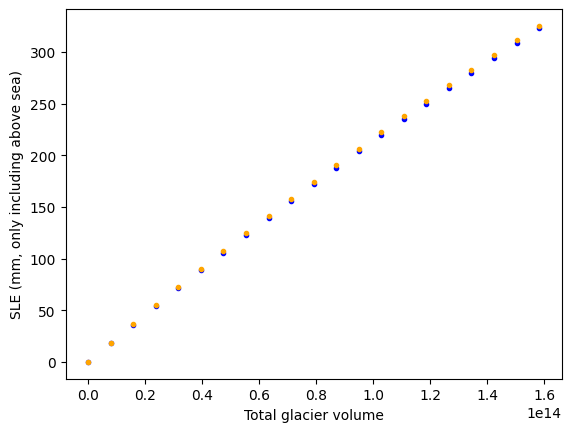

In [59]:
import oggm
df_itmix = pd.read_hdf(oggm.utils.get_demo_file('rgi62_itmix_df.h5'))
# quation as well as the percentage difference:

def vol_tot_to_below_sl(vol_tot):
    slope_unfilled = -6.859874897888118*1e-7 * 1e-9 #km3 to 
    intercept_unfilled = 0.9540695779131956 ## that means the ratio is maximum 0.95

    ratio = slope_unfilled*vol_tot + intercept_unfilled 
    if ratio <0.7:
        ratio = 0.7
    vol_bsl = vol_tot - vol_tot*ratio
    return vol_bsl 

def compute_slr_jan(v_tot,v_bsl):
    """After Farinotti 2019"""
    rho = 900
    rho_oc = 1028
    A_oc = 362.5 * 1e9
    return (v_tot-v_bsl)* rho / (A_oc * rho_oc)

def compute_slr2_jan(v_tot, v_bsl):
    """slr2"""
    rho = 900
    rho_w = 1000
    A_oc = 362.5 * 1e9
    return (v_tot * (rho / rho_w) - v_bsl) / A_oc
total_slr = compute_slr_jan(df_itmix['vol_itmix_m3'].sum(), df_itmix['vol_bsl_itmix_m3'].sum())
total_slr2 = compute_slr2_jan(df_itmix['vol_itmix_m3'].sum(), df_itmix['vol_bsl_itmix_m3'].sum())


fractions = np.arange(0,1.05,0.05)
for f in fractions:
    vol_tot = df_itmix['vol_itmix_m3'].sum() * f
    total_slr_via_ratio = compute_slr_jan(vol_tot, vol_tot_to_below_sl(vol_tot))
    plt.plot(vol_tot, total_slr_via_ratio,'.', color='blue')
    
    total_slr_via_ratio_2 = compute_slr2_jan(vol_tot, vol_tot_to_below_sl(vol_tot))
    plt.plot(vol_tot, total_slr_via_ratio_2,'.', color='orange')
plt.xlabel('Total glacier volume')

plt.ylabel('SLE (mm, only including above sea)')

$\Delta M_{asl} = M_{2020}\cdot ratio_{M,2020} - M_{ss}\cdot ratio_{M,ss}$


$SLE(mm) = 1000\cdot \frac{\Delta M_{asl}}{\rho_{ocean}}\cdot A_{ocean}$

better approach from Jan: 

$\Delta M_{bsl} = M_{2020}\cdot(1-ratio_{M,2020}) - M_{ss}\cdot(1-ratio_{M,ss})$


$SLE(mm) = 1000\cdot (\frac{\Delta M_{tot}}{\rho_{water}} - \frac{\Delta M_{bsl}}{\rho_{ice}})\cdot A_{ocean}$

In [60]:
total_slr, total_slr2, total_slr_via_ratio

(323.93477635978985, 326.3760936564503, 322.9843015129744)

**In progress**

In [62]:
import dataframe_image as dfi
#pd_steady_state_table_sel_styled = pd_steady_state_table_sel.style.background_gradient() #adding a gradient based on values in cell
dfi.export(pd_steady_state_table_sel,"table1.png",table_conversion='matplotlib', fontsize=10)

In [63]:
pd_steady_state_table_sel_styled

NameError: name 'pd_steady_state_table_sel_styled' is not defined

In [560]:
pd_steady_state_table_sel

Mass 2020  \
                                            (Gt)   
Region                                             
Globally                                  137491   
Globally_mm_0.85                          137491   
Globally_mm_1.00                          137491   
Globally_mm_var                           137491   
Subantarctic & Antarctic Islands (R19)     41377   
Arctic Canada N (R03)                      24851   
Alaska (R01)                               16246   
Greenland Periphery (R05)                  13410   
Russian Arctic (R09)                       12965   
Arctic Canada S (R04)                       7212   
Svalbard & Jan Mayen (R07)                  6566   
Southern Andes (R17)                        4368   
Iceland (R06)                               3194   
Central Asia (R13)                          2771   
South Asia W (R14)                          2485   
W Canada & US (R02)                          795   
South Asia E (R15)                           656   
Scandinavia (R08)                            237   
North Asia (R10)                             109   
Central Europe (R11)                          85   
Low Latitudes (R16)                           69   
New Zealand (R18)                             53   
Caucasus & Middle East (R12)                  43   

                                       Glacier mass loss (relative to 2020)  \
                                                                       unit   
Region                                                                        
Globally                                                                  %   
Globally_mm_0.85                                                     mm SLE   
Globally_mm_1.00                                                     mm SLE   
Globally_mm_var                                                      mm SLE   
Subantarctic & Antarctic Islands (R19)                                    %   
Arctic Canada N (R03)                                                     %   
Alaska (R01)                                                              %   
Greenland Periphery (R05)                                                 %   
Russian Arctic (R09)                                                      %   
Arctic Canada S (R04)                                                     %   
Svalbard & Jan Mayen (R07)                                                %   
Southern Andes (R17)                                                      %   
Iceland (R06)                                                             %   
Central Asia (R13)                                                        %   
South Asia W (R14)                                                        %   
W Canada & US (R02)                                                       %   
South Asia E (R15)                                                        %   
Scandinavia (R08)                                                         %   
North Asia (R10)                                                          %   
Central Europe (R11)                                                      %   
Low Latitudes (R16)                                                       %   
New Zealand (R18)                                                         %   
Caucasus & Middle East (R12)                                              %   

                                                                      \
                                             ΔT=1.2°C       ΔT=1.5°C   
Region                                                                 
Globally                                 40 [-1,  68]   47 [ 6,  75]   
Globally_mm_0.85                        125 [-4, 215]  148 [20, 234]   
Globally_mm_1.00                        147 [-5, 253]  174 [23, 275]   
Globally_mm_var                         113 [-4, 253]  135 [18, 275]   
Subantarctic & Antarctic Islands (R19)  36 [-44,  60]  44 [-33,  67]   
Arctic Canada N (R03)                   32 [-10,  71]  

In [546]:
# Define the columns after which you want to add vertical lines
columns_with_lines = ['unit', 'unit2']

# Define CSS for vertical lines
css = [
    {'selector': f'td:nth-child({pd_steady_state_table_sel.columns.get_loc(col) * 2}) + td',
     'props': [('border-left', '1px solid black')]} for col in columns_with_lines
]

# Apply CSS to DataFrame
styled_df = pd_steady_state_table_sel.style.set_table_styles(css)

# Display styled DataFrame
styled_df

KeyError: 'unit'

### OLD

In [561]:
import docx
import pandas as pd
from pathlib import Path
# https://stackoverflow.com/questions/40596518/writing-a-python-pandas-dataframe-to-word-document
def pd_table_to_word(df, save_to_path, include_index=False):
    if Path(save_to_path).exists():
        response = input("Document already exists and will be overwritten. Sure you want to overwrite this documents? Y/ N")
        if response.lower() not in ["y", "ye", "yes", "yeah"]:
            return "Aborted overwriting file."
    doc = docx.Document()
    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    
    n_rows, n_cols = df.shape[0], df.shape[1] +1
    if include_index:
        n_rows += 1
        
    t = doc.add_table(n_rows, n_cols)
    
    # add the header rows.
    for j in range(df.shape[-1]):
        if include_index:
            t.cell(0,j+1).text = df.columns[j]
        else:
            t.cell(0,j).text = df.columns[j]
    
    # add index names
    if include_index:
        t.cell(0, 0).text = df.index.name
        for i in range(df.shape[0]):
            t.cell(i+1, 0).text = df.index[i]

    # add the rest of the data frame
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            if include_index:
                t.cell(i+1, j+1).text = str(df.values[i,j])
            else:
                t.cell(i+1, j).text = str(df.values[i,j])
    doc.save(save_to_path)
    return f"Table saved to {save_to_path}"


In [563]:
pd_table_to_word(pd_steady_state_table_sel, 'table_1.docx',include_index = True)

'Table saved to table_1.docx'

In [19]:
pd_table_to_word(df_s4, 'table_s4.docx', include_index = True)

TypeError: 'NoneType' object is not iterable

TypeError: 'NoneType' object is not iterable

In [164]:
df_s4

,Simulation,RGI date,RGI v6.0,RGI date volume,2020 volume,2000-2019,Glacier surface
,time (2000,(glacier-area,area,consensus estimate,estimate,volume changes,slope (glacier-area
,or 5000),weighted median),(km²),(km³),(km³),% rel. to 2000 Vol,"weighted, in °)"
All,,2000,705739,158157,152767,4.1,
01,5000,2010,86725,18978,18051,8.7,13.9
02,2000,2004,14524,1047,883,20.1,18.3
03,5000,1999,105111,28331,27612,2.6,9.6
04,5000,2001,40888,8611,8014,7.8,11.5
05,5000,2001,89717,15692,14899,5.6,10.3
06,5000,2000,11060,3770,3549,6.2,6.7
07,5000,2008,33959,7470,7295,3.4,8.8


,Simulation,RGI date,RGI v6.0,RGI date volume,2020 volume,2000-2019,Glacier surface
,time (2000,(glacier-area,area,consensus estimate,estimate,volume changes,slope (glacier-area
,or 5000),weighted median),(km²),(km³),(km³),% rel. to 2000 Vol,"weighted, in °)"
All,,2000.0,705738.792,158156598376377.09375,152767463429916.09375,4.105953,
01,5000,2010.0,86725.053,18978458004176.425781,18050607173096.425781,8.688198,13.940351
02,2000,2004.0,14524.224,1046788230881.776855,883492104582.776855,20.134798,18.32646
03,5000,1999.0,105110.642,28331244808068.367188,27612177855308.367188,2.604166,9.618978
04,5000,2001.0,40888.228,8611334843760.109375,8013633988304.109375,7.781384,11.503623
05,5000,2001.0,89717.066,15692033458744.644531,14899494353980.644531,5.608599,10.303661
06,5000,2000.0,11059.7,3769573579070.28418,3549316745270.28418,6.205612,6.74303
07,5000,2008.0,33958.934,7470376412511.064453,7295130096198.064453,3.399255,8.754521


In [79]:
col = df_s4.columns
# Reshaping DataFrame to split long column names into multiple rows
columns_list = []
for col in df_s4.columns:
    parts = col.split('_')
    columns_list.extend(parts)

# Create a new DataFrame with reshaped columns
df_s4_reshaped = pd.DataFrame(df_s4.values, columns=columns_list)


ValueError: Shape of passed values is (20, 6), indices imply (20, 19)

In [80]:
columns_list

['Simulation',
 'time',
 '(2000 or 5000)',
 'RGI date',
 '(glacier-area',
 'weighted median)',
 'RGI v6.0',
 'area',
 '(km²)',
 '',
 'Consensus estimate',
 'volume (km³)',
 '(at RGI date)',
 '2020 volume',
 'estimate (km³)',
 '',
 '20-year reg',
 'ΔVolΔt 2000-2019',
 '% rel. to 2000 Vol']

In [70]:
df_s4_reshaped

MultiIndex([(        'Simulation',                 'time_(2000 or 5000)'),
            (          'RGI date',      '(glacier-area_weighted median)'),
            (          'RGI v6.0',                         'area_(km²)_'),
            ('Consensus estimate',          'volume (km³)_(at RGI date)'),
            (       '2020 volume',                     'estimate (km³)_'),
            (       '20-year reg', 'ΔVolΔt 2000-2019_% rel. to 2000 Vol')],
           )

In [69]:
df_s4

,Simulation,RGI date,RGI v6.0,Consensus estimate,2020 volume,20-year reg
,time_(2000 or 5000),(glacier-area_weighted median),area_(km²)_,volume (km³)_(at RGI date),estimate (km³)_,ΔVolΔt 2000-2019_% rel. to 2000 Vol
All,,2000.0,705738.792,1.581566e+14,1.527675e+14,4.105953
01,5000,2010.0,86725.053,1.897846e+13,1.805061e+13,8.688198
02,2000,2004.0,14524.224,1.046788e+12,8.834921e+11,20.134798
03,5000,1999.0,105110.642,2.833124e+13,2.761218e+13,2.604166
04,5000,2001.0,40888.228,8.611335e+12,8.013634e+12,7.781384
05,5000,2001.0,89717.066,1.569203e+13,1.489949e+13,5.608599
06,5000,2000.0,11059.700,3.769574e+12,3.549317e+12,6.205612
07,5000,2008.0,33958.934,7.470376e+12,7.295130e+12,3.399255
08,2000,2002.0,2949.103,2.985090e+11,2.637832e+11,14.874620
